# Problem 1:
<b> A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.</b>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<b> 1.1 Read the data and do exploratory data analysis. Describe the data briefly.</b>

In [2]:
df= pd.read_csv("bank_marketing_part1_Data.csv")

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [6]:
df.shape

(210, 7)

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


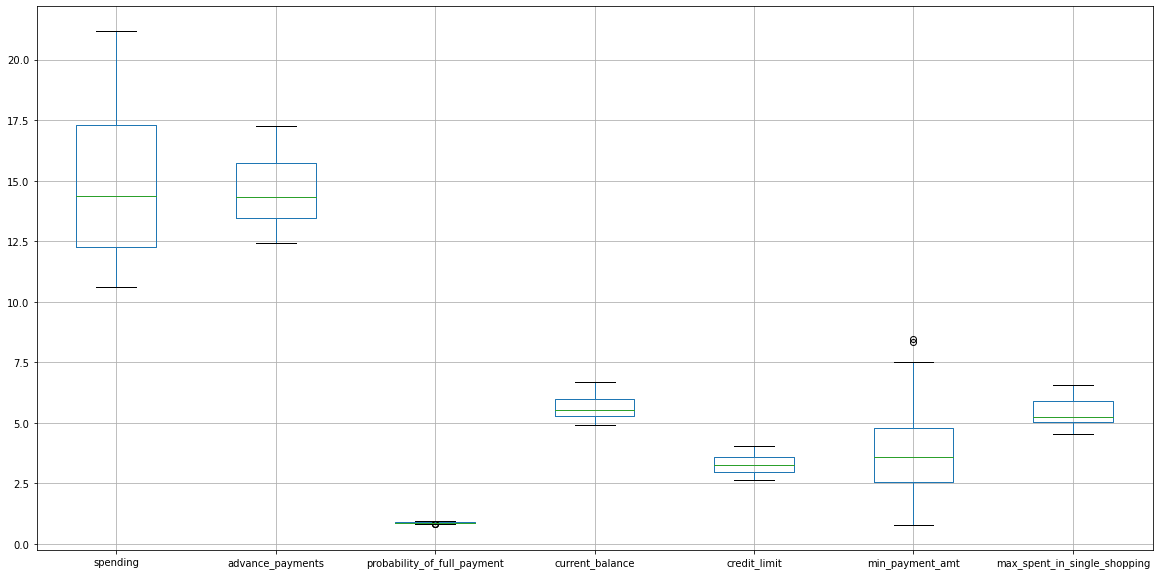

In [9]:
plt.figure(figsize=(20,10))
df[['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping']].boxplot()
plt.show()

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
iqr = Q3-Q1
iqr

spending                        5.035000
advance_payments                2.265000
probability_of_full_payment     0.030875
current_balance                 0.717500
credit_limit                    0.617750
min_payment_amt                 2.207250
max_spent_in_single_shopping    0.832000
dtype: float64

In [11]:
outliers = (df<(Q1-1.5*iqr))|(df>(Q3+1.5*iqr))
print('The below list shows the number of outliers present in each columns:')
outliers.sum()

The below list shows the number of outliers present in each columns:


spending                        0
advance_payments                0
probability_of_full_payment     3
current_balance                 0
credit_limit                    0
min_payment_amt                 2
max_spent_in_single_shopping    0
dtype: int64

<b>1.2  Do you think scaling is necessary for clustering in this case? Justify</b>

Scaling is necessary for clustering. Though most of the columns in this case are amount/money, the units are different i.e few are in 1000s, 10000s and 100s and the column "probability_of_full_payment" is probablity, so it is better we scale it to obtain proper clusters. Since clustering technique uses the distances between two data points, it is necessary that we standardize the columns to form distinct clusters.

<b>1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them</b>

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
X = StandardScaler()

In [14]:
scaled_df = X.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
wardlink = linkage(scaled_df, method = 'ward')

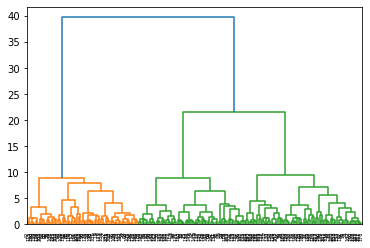

In [17]:
dend = dendrogram(wardlink)

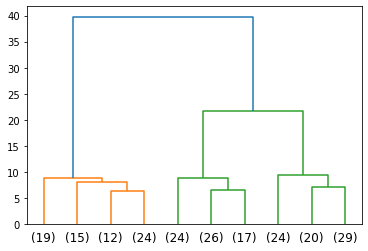

In [18]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [19]:
from scipy.cluster.hierarchy import fcluster

In [20]:
clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [21]:
df['hier_clusters']=clusters
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hier_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


The optimum clusters would be 2.

<b>1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.</b>

In [22]:
from sklearn.cluster import KMeans

In [23]:
k_means = KMeans(n_clusters = 2)

In [24]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [25]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [26]:
k_means.inertia_

659.171754487041

In [27]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999998

In [28]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [29]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

371.65314399951626

In [30]:
wss =[]

In [31]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [32]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.5811909715524,
 327.442504700837,
 289.8831842514518,
 265.0178056622643,
 240.07897279861916,
 223.0360993284905,
 206.44306862461164]

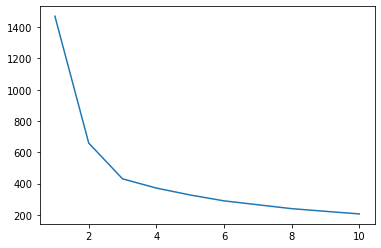

In [33]:
plt.plot(range(1,11), wss)

In [34]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(scaled_df)
labels = k_means.labels_

In [35]:
df['KM_Clusters'] =labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hier_clusters,KM_Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [37]:
silhouette_score(scaled_df,labels)

0.46577247686580914

In [38]:
sil_width = silhouette_samples(scaled_df,labels)

In [39]:
silhouette_samples(scaled_df,labels).min()

-0.006171238927461077

In [40]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,hier_clusters,KM_Clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,0.603797
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0,0.008748
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,0.678038
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0,0.495306
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,0.548072


In [42]:
df.to_csv('Clustering_DataFrame1.csv')

<b>1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.</b>

Cluster profiles

# Problem 2
<b> An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.</b>

<b>2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it</b>

In [43]:
df1 = pd.read_csv("insurance_part2_data.csv")

In [44]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [45]:
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [46]:
df1.shape

(3000, 10)

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [48]:
df1['Duration'].replace(to_replace=-1,value=df1['Duration'].median(), inplace= True)

In [49]:
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3-q1
iqr

Age          10.000
Commision    17.235
Duration     52.000
Sales        49.000
dtype: float64

In [50]:
outliers = (df1<(q1-1.5*iqr))|(df1>(q3+1.5*iqr))
print('The below list shows the number of outliers present in each columns:')
outliers.sum()

The below list shows the number of outliers present in each columns:


Age             204
Agency_Code       0
Channel           0
Claimed           0
Commision       362
Destination       0
Duration        382
Product Name      0
Sales           353
Type              0
dtype: int64

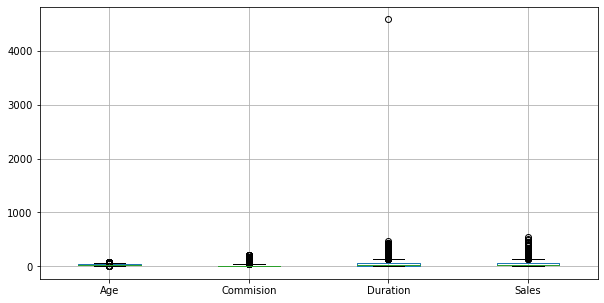

In [51]:
plt.figure(figsize=(10,5))
df1[['Age','Commision','Duration','Sales']].boxplot()
plt.show()

In [52]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [53]:
for feature in df1[['Age','Commision','Duration','Sales']]: 
    lr,ur=treat_outlier(df1[feature])
    df1[feature]=np.where(df1[feature]>ur,ur,df1[feature])
    df1[feature]=np.where(df1[feature]<lr,lr,df1[feature])

In [54]:
outliers = (df1<(q1-1.5*iqr))|(df1>(q3+1.5*iqr))
print('The below list shows the number of outliers present in each columns:')
outliers.sum()

The below list shows the number of outliers present in each columns:


Age             0
Agency_Code     0
Channel         0
Claimed         0
Commision       0
Destination     0
Duration        0
Product Name    0
Sales           0
Type            0
dtype: int64

In [55]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [56]:
print('Age \n',df1.Age.value_counts())
print('\n')
print('Agency_Code \n',df1.Agency_Code.value_counts())
print('\n')
print('Type \n',df1.Type.value_counts())
print('\n')
print('Claimed \n',df1.Claimed.value_counts())
print('\n')
print('Commision \n',df1.Commision.value_counts())
print('\n')
print('Channel \n',df1.Channel.value_counts())
print('\n')
print('Duration \n',df1.Duration.value_counts())
print('\n')
print('Sales \n',df1.Sales.value_counts())
print('\n')
print('Product name \n',df1["Product Name"].value_counts())
print('\n')
print('Destination \n',df1.Destination.value_counts())


Age 
 36.0    999
57.0    215
31.0    125
48.0    108
30.0     96
35.0     94
28.0     85
25.0     73
26.0     71
32.0     70
29.0     66
37.0     59
34.0     56
27.0     54
44.0     49
38.0     48
39.0     46
33.0     45
40.0     43
24.0     43
41.0     43
45.0     43
46.0     40
22.0     36
53.0     35
47.0     35
23.0     35
43.0     35
42.0     34
50.0     32
52.0     29
54.0     26
51.0     26
49.0     25
56.0     21
21.0     17
55.0     15
20.0     10
17.0      9
19.0      7
18.0      2
Name: Age, dtype: int64


Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Commision 
 0.0000     1366
43.0875     362
23.7600      61
7.7000       57
17.8200      57
           ... 
41.4400       1
2.6400        1
17.2900       1
18.1300       1
14.4600       1
Name: Commision, Length: 251, dtype: int64


Channel 
 1    2954
0      46
Name: Chann

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   float64
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 111.5 KB


In [58]:
df1['Duration'].nunique()

139

In [59]:
df1['Age'].nunique()

41

In [60]:
df1.duplicated().sum()

286

In [61]:
df1= df1.drop_duplicates()

In [62]:
df1.shape

(2714, 10)

In [63]:
df1.duplicated().sum()

0

In [64]:
df1.corr()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Age,1.000000,0.056331,-0.029683,-0.066977,0.065365,-0.048763,-0.000639,0.008000,0.008103,0.017053
Agency_Code,0.056331,1.000000,0.502443,-0.369413,-0.416781,0.027664,-0.047049,-0.196499,-0.311774,0.083317
Type,-0.029683,0.502443,1.000000,-0.277093,-0.224872,-0.101970,-0.001830,-0.066431,0.109815,0.325487
Claimed,-0.066977,-0.369413,-0.277093,1.000000,0.224757,-0.022341,0.103001,0.242900,0.170329,-0.010986
Commision,0.065365,-0.416781,-0.224872,0.224757,1.000000,0.023160,0.303609,0.588765,0.301062,0.251261
Channel,-0.048763,0.027664,-0.101970,-0.022341,0.023160,1.000000,-0.054432,0.026200,-0.052730,0.041081
Duration,-0.000639,-0.047049,-0.001830,0.103001,0.303609,-0.054432,1.000000,0.405508,0.190982,0.100807
Sales,0.008000,-0.196499,-0.066431,0.242900,0.588765,0.026200,0.405508,1.000000,0.335380,0.273329
Product Name,0.008103,-0.311774,0.109815,0.170329,0.301062,-0.052730,0.190982,0.335380,1.000000,0.061126
Destination,0.017053,0.083317,0.325487,-0.010986,0.251261,0.041081,0.100807,0.273329,0.061126,1.000000


In [65]:
df1['Claimed'].value_counts(normalize=True)

0    0.707811
1    0.292189
Name: Claimed, dtype: float64

<b>2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network</b>

In [66]:
X = df1.drop("Claimed", axis=1)
y = df1.pop("Claimed")
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

<b>CART Model </b>

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [69]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [70]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Claim_Tree_File = open('d:\claim_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Claim_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Claim_Tree_File.close()

In [71]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.187435
Agency_Code   0.146990
Type          0.000000
Commision     0.081556
Channel       0.007261
Duration      0.282267
Sales         0.197142
Product Name  0.065631
Destination   0.031718


In [72]:
y_predict = dt_model.predict(X_test)

In [73]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=30)

In [74]:
train_char_label = ['No', 'Yes']
Claim_Tree_File_Reg = open('d:\claim_tree_reg.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=Claim_Tree_File_Reg, feature_names = list(X_train), class_names = list(train_char_label))

Claim_Tree_File_Reg.close()

In [75]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

<b>Random Forest </b>

In [76]:
train_labels.value_counts(normalize=True)

0    0.706688
1    0.293312
Name: Claimed, dtype: float64

In [77]:
test_labels.value_counts(normalize=True)

0    0.710429
1    0.289571
Name: Claimed, dtype: float64

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfcl = RandomForestClassifier(n_estimators = 100,max_features=5,random_state=0)
rfcl = rfcl.fit(X_train, train_labels)

In [80]:
rfcl

RandomForestClassifier(max_features=5, random_state=0)

In [81]:
ytrain_predict1 = rfcl.predict(X_train)
ytest_predict1 = rfcl.predict(X_test)

<b>Random Forest Grid search </b>

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7,10],
    'max_features': [4,5,6],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl1 = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl1, param_grid = param_grid, cv = 10)

In [83]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [84]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [85]:
best_grid = grid_search.best_estimator_

In [86]:
best_grid.feature_importances_

array([0.07521622, 0.30070783, 0.03158621, 0.11278766, 0.00179608,
       0.08238316, 0.18073254, 0.20219285, 0.01259745])

In [87]:
best_grid

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=0)

In [88]:
ytrain_predict2 = best_grid.predict(X_train)
ytest_predict2 = best_grid.predict(X_test)

<b>ANN</b>

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=1)

In [91]:
sc = StandardScaler()

In [92]:
x_train = sc.fit_transform(x_train)

In [93]:
x_train

array([[-0.69019062, -0.35287878,  0.78759581, ..., -1.20903051,
         0.39358243, -0.45606605],
       [ 1.14745258, -0.35287878,  0.78759581, ...,  0.06524249,
         1.22496512, -0.45606605],
       [ 1.14745258, -1.35604765, -1.26968679, ..., -1.18978639,
         0.39358243, -0.45606605],
       ...,
       [-0.14970733,  0.65029009,  0.78759581, ...,  0.24728149,
         0.39358243, -0.45606605],
       [ 0.06648599,  0.65029009,  0.78759581, ...,  0.29929263,
        -0.43780026,  1.22889394],
       [-0.14970733,  0.65029009,  0.78759581, ...,  2.49676341,
         0.39358243, -0.45606605]])

In [94]:
x_test = sc.transform(x_test)

In [95]:
x_test

array([[-1.77115721,  0.65029009,  0.78759581, ...,  0.11725363,
         0.39358243, -0.45606605],
       [-0.14970733,  0.65029009,  0.78759581, ..., -0.68891908,
         0.39358243, -0.45606605],
       [ 0.17458265,  0.65029009,  0.78759581, ..., -0.68891908,
         0.39358243, -0.45606605],
       ...,
       [-0.69019062, -1.35604765, -1.26968679, ..., -0.68891908,
        -1.26918295, -0.45606605],
       [-1.0144806 ,  0.65029009,  0.78759581, ..., -0.42886337,
        -0.43780026, -0.45606605],
       [ 0.49887263, -1.35604765, -1.26968679, ...,  0.07824527,
         2.05634781, -0.45606605]])

In [96]:
from sklearn.neural_network import MLPClassifier

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300,500],
    'max_iter': [5000,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01,0.001],
}

nncl = MLPClassifier(random_state=1)

grid_search1 = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [99]:
grid_search1.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 500],
                         'max_iter': [5000, 2500, 7000, 6000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01, 0.001]})

In [100]:
grid_search1.best_params_

{'hidden_layer_sizes': 300, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}

In [101]:
best_grid1 = grid_search1.best_estimator_

In [102]:
best_grid1

MLPClassifier(hidden_layer_sizes=300, max_iter=5000, random_state=1, tol=0.01)

In [103]:
ytrain_predict3 = best_grid1.predict(x_train)
ytest_predict3 = best_grid1.predict(x_test)

<b> 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model</b>

In [104]:
from sklearn.metrics import classification_report,confusion_matrix

<b>1. CART :</b>

AUC: 0.847


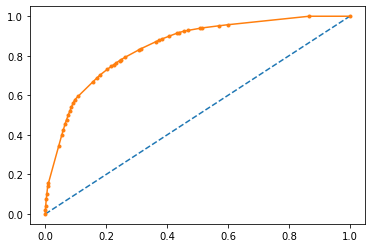

In [105]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.750


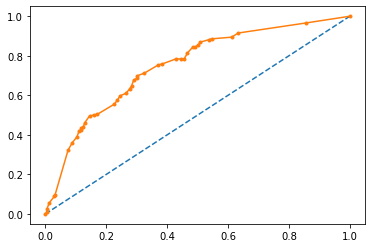

In [106]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [107]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1342
           1       0.71      0.58      0.64       557

    accuracy                           0.81      1899
   macro avg       0.77      0.74      0.75      1899
weighted avg       0.80      0.81      0.80      1899



In [108]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       579
           1       0.56      0.50      0.53       236

    accuracy                           0.74       815
   macro avg       0.68      0.67      0.68       815
weighted avg       0.73      0.74      0.74       815



In [109]:
confusion_matrix(train_labels, ytrain_predict)

array([[1212,  130],
       [ 235,  322]], dtype=int64)

In [110]:
confusion_matrix(test_labels, ytest_predict)

array([[487,  92],
       [118, 118]], dtype=int64)

In [111]:
reg_dt_model.score(X_train,train_labels)

0.8077935755660874

In [112]:
reg_dt_model.score(X_test,test_labels)

0.7423312883435583

<b>2. Random Forest :</b><br>
</br>
<b>a. Without best grid search</b>

In [113]:
rfcl.score(X_train,train_labels)

0.990521327014218

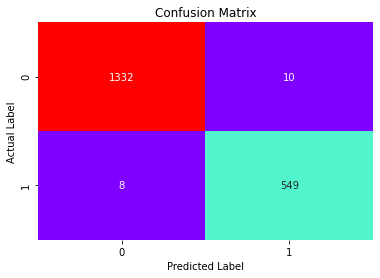

In [114]:
confusion_matrix(train_labels,ytrain_predict1)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict1),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [115]:
rfcl.score(X_test,test_labels)

0.7349693251533742

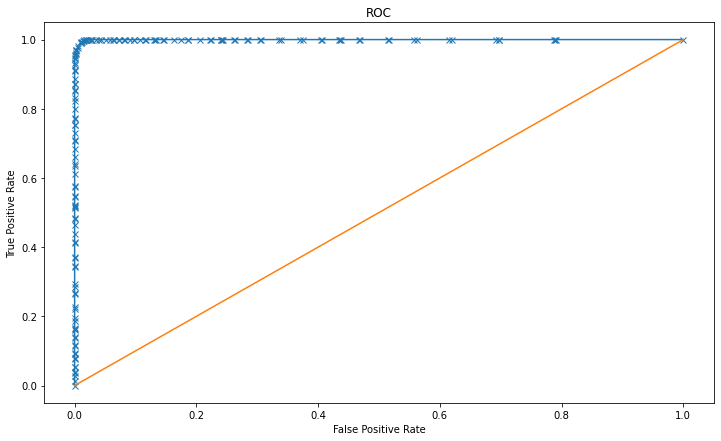

Area under Curve is 0.9997270881104062


In [116]:
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

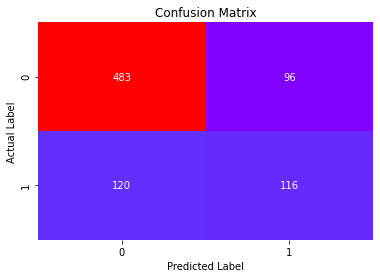

In [117]:
confusion_matrix(test_labels,ytest_predict1)
sns.heatmap(confusion_matrix(test_labels,ytest_predict1),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [118]:
print(classification_report(test_labels,ytest_predict1))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       579
           1       0.55      0.49      0.52       236

    accuracy                           0.73       815
   macro avg       0.67      0.66      0.67       815
weighted avg       0.73      0.73      0.73       815



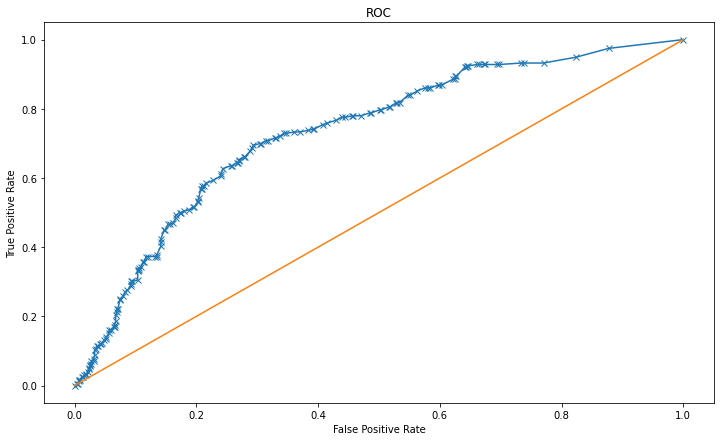

Area under Curve is 0.7335045812476215


In [119]:
rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

<b>b.With best grid search</b>

In [120]:
confusion_matrix(train_labels,ytrain_predict2)

array([[1211,  131],
       [ 257,  300]], dtype=int64)

In [121]:
print(classification_report(train_labels,ytrain_predict2))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1342
           1       0.70      0.54      0.61       557

    accuracy                           0.80      1899
   macro avg       0.76      0.72      0.73      1899
weighted avg       0.79      0.80      0.79      1899



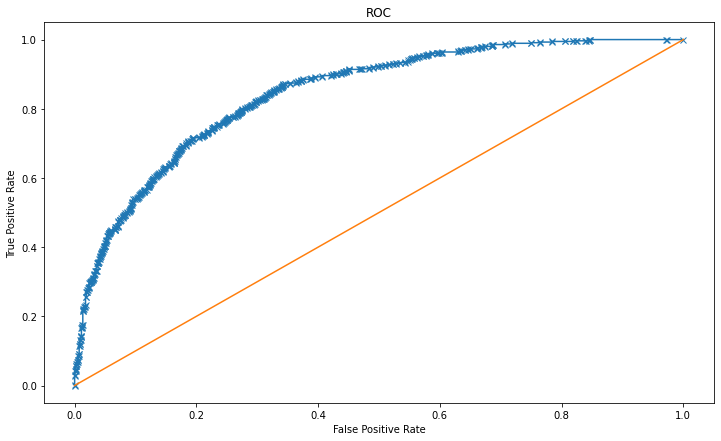

Area under Curve is 0.8443124627087308


In [122]:
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

In [123]:
confusion_matrix(test_labels,ytest_predict2)


array([[503,  76],
       [118, 118]], dtype=int64)

In [124]:
print(classification_report(test_labels,ytest_predict2))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       579
           1       0.61      0.50      0.55       236

    accuracy                           0.76       815
   macro avg       0.71      0.68      0.69       815
weighted avg       0.75      0.76      0.75       815



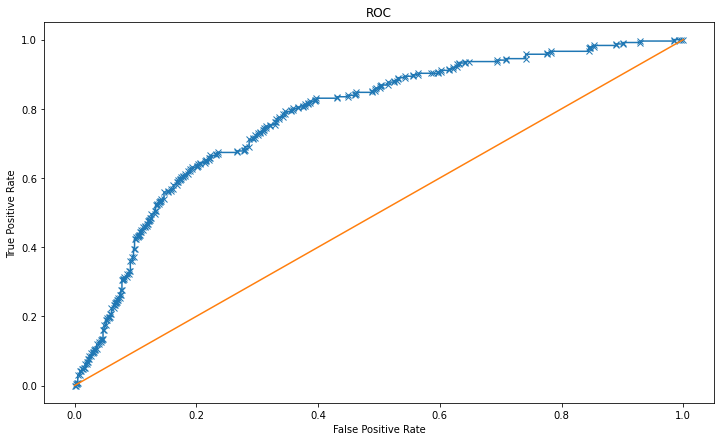

Area under Curve is 0.7763458329674191


In [125]:
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))

<b>3.ANN</b>

In [126]:
confusion_matrix(y_train,ytrain_predict3)

array([[1201,  151],
       [ 290,  257]], dtype=int64)

In [127]:
cm = confusion_matrix(y_test, ytest_predict3)
cm

array([[507,  62],
       [136, 110]], dtype=int64)

In [128]:
print(classification_report(y_test, ytest_predict3))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       569
           1       0.64      0.45      0.53       246

    accuracy                           0.76       815
   macro avg       0.71      0.67      0.68       815
weighted avg       0.74      0.76      0.74       815



In [129]:
print(classification_report(y_train, ytrain_predict3))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84      1352
           1       0.63      0.47      0.54       547

    accuracy                           0.77      1899
   macro avg       0.72      0.68      0.69      1899
weighted avg       0.75      0.77      0.76      1899



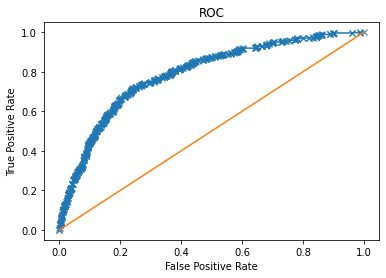

Area under Curve is 0.7901774607055158


In [130]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid1.predict_proba(x_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid1.predict_proba(x_train)[:,1]))

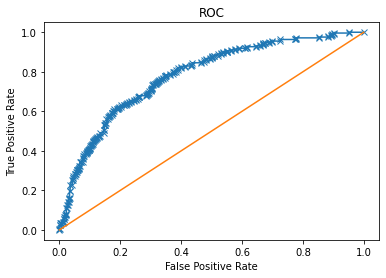

Area under Curve is 0.7819416463057427


In [131]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid1.predict_proba(x_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid1.predict_proba(x_test)[:,1]))